$\Huge{\text{Física Computacional}}$

# Tema 6: Análisis de Fourier. 

## 6.1 Series de Fourier.

- Sea f(x) una función periódica en el intervalo $[0,L]$:

$$f(x+L)=f(x),\;\forall x\in {\cal D}_f$$

- que cumple los las condiciones:    
<br/>

     - Es absolutamente integrable.
     - Esta acotada. 
     - Tiene un número finito de discontinuidades en su periodo, y estas son finitas. 
    
    
    
- Entonces dicha función puede ser escrita como una serie de Fourier.

- Si la función es par con especto al punto medio de su intevalo periódico: 

$$f(x-L/2)=f(x+L/2),$$

$\quad$ entonces puede ser escrita como:


$$f(x)=\sum_{k=0}^\infty{\alpha_k\,\cos\left(\frac{2\pi k x}{L}\right)}.$$

- Si la función es impar: 

$$f(x-L/2)=-f(x+L/2),$$

$\quad$ su serie de Fourier es:

$$f(x)=\sum_{k=1}^\infty{\beta_k\,\sin\left(\frac{2\pi k x}{L}\right)}.$$

- Mientras que en el caso general, cualquier función periódica sin simetría definida puede ser escrita como:

$$f(x)=\sum_{k=0}^\infty{\alpha_k\,\cos\left(\frac{2\pi k x}{L}\right)}+\sum_{k=1}^\infty{\beta_k\,\sin\left(\frac{2\pi k x}{L}\right)} =\sum_{k=-\infty}^\infty{\gamma_k\,\exp\left(i\frac{2\pi k x}{L}\right)},\quad$$

$\quad$ donde los coeficientes $gamma$ vienen dados por:

$$\gamma_k=\left\{\begin{array}{lr}\frac{1}{2}\left(\alpha_{-k}+i\beta_{-k}\right)&\text{if}\; k<0,\nonumber\\\alpha_0&\text{if}\; k=0,\nonumber\\\frac{1}{2}\left(\alpha_{k}-i\beta_{k}\right)&\text{if}\; k>0.\nonumber\\\end{array}\right.$$

- Una vez determinado el valor de los coeficientes $\gamma_k$ de una función periódica $f(x)$, la serie de Fourier permite obtener una representación de la función simple y compacta para su análisis numérico.

- La series de Fourier se limitan a funciones periódicas.   
  Sin embargo, si estamos interesados en describir una función no periódica $f(x)$ sólamente en un intervalo $[0,L]$, podemos describirla en función de la serie de fourier de una función periódica $g(x)$ que coincide con ella en el intervalo $[0,L]$. 

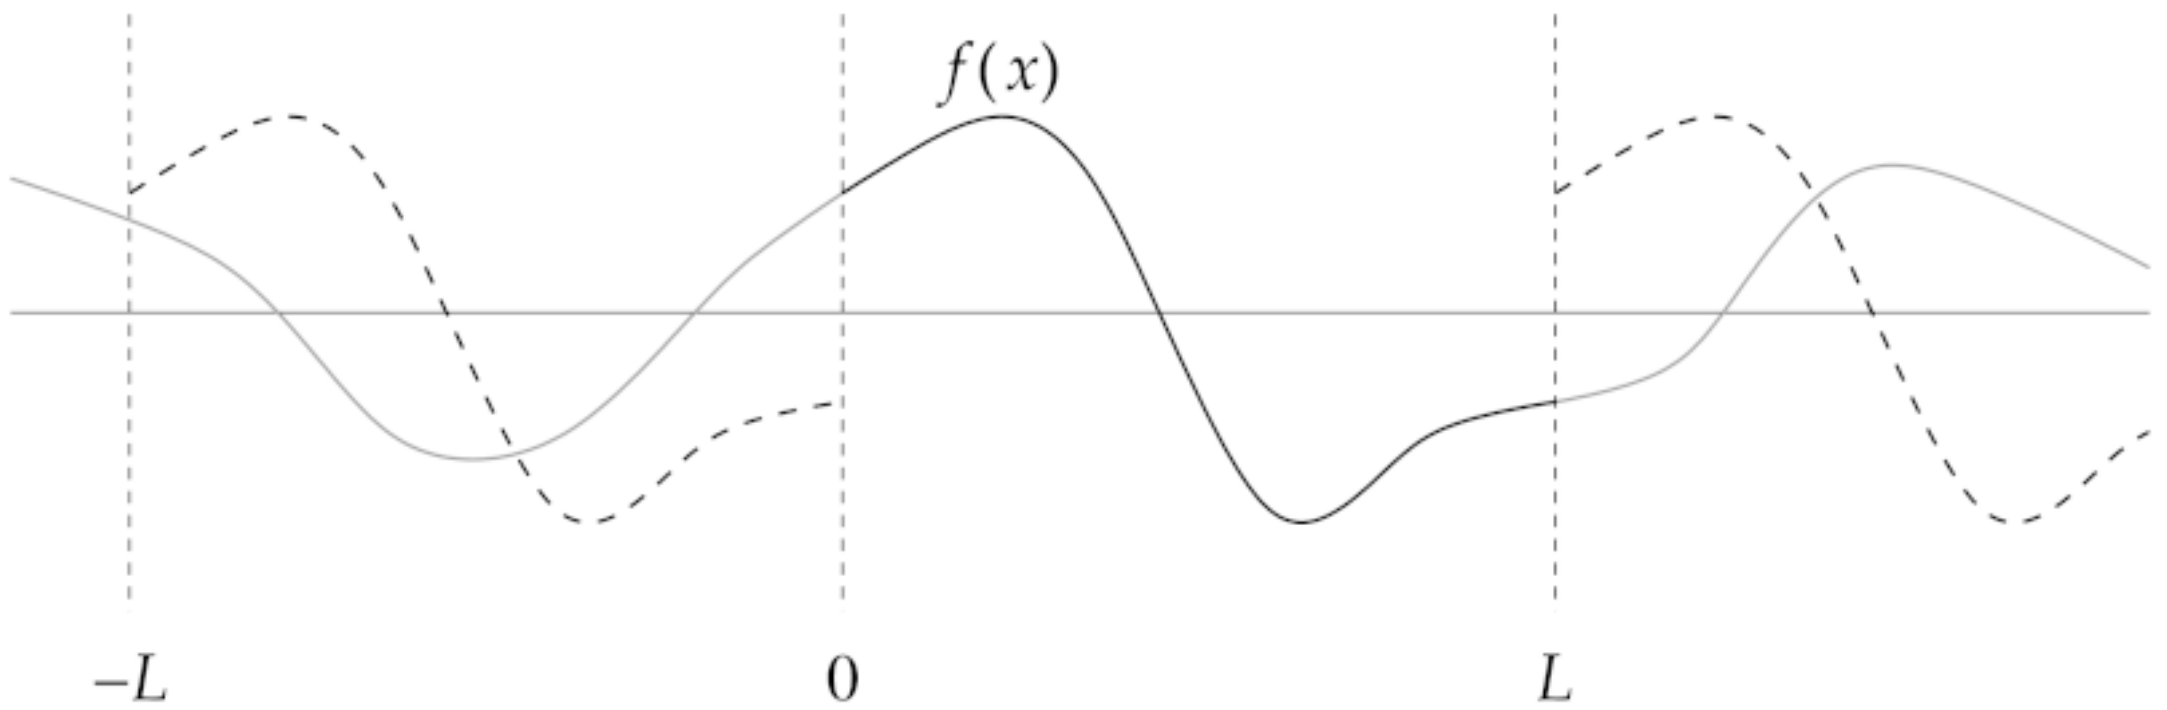

In [2]:
from IPython.display import Image,display
display(Image("non-periodic-f.png",width=900))

**Determinación de los coeficientes**

- Los coeficientes $\gamma_k$ de la serie de Fourier de una función $f(x)$ se pueden obtener trivialmente usando que:

$$\int\limits_0^L{\exp\left(i\frac{2\pi\left(k'-k\right)x}{L}\right)\text{d}x}=\frac{-i L}{2\pi\left(k'-k\right)}\left[\text{e}^{i\,2\pi(k'-k)}-1\right]=L\,\delta(k'-k),$$

- De esta forma se obtiene que:

$$\int\limits_0^L{f(x)\exp\left(-i\frac{2\pi kx}{L}\right)}\text{d}x=\sum_{k'=-\infty}^{\infty}{\gamma_{k'}\int\limits_0^L{\exp\left(i\frac{2\pi\left(k'-k\right)x}{L}\right)\text{d}x}}=L\gamma_k,$$

$\quad$ y los coeficientes vienen dados por la integral:

$$\gamma_k=\frac{1}{L}\int\limits_0^L{f(x)\exp\left(-i\frac{2\pi kx}{L}\right)}\text{d}x.$$

## 6.2 Transformada de Fourier discreta.

- Mientras que para algunas funciones podremos calcular las integrales que involucran $\gamma_k$ de forma analítica, en general esto no será posible, bien porque la integral tiene que calcularse numericamente o porque no se tiene una expresión analítica para $f(x)$.


- En estos casos las integrales de los coeficientes tendrán que calcularse numéricamente.

- Por ejemplo aproximando la integral por la regla del trapecio se tiene con $N$ particiones en los puntos  $x_n=\displaystyle\frac{n\,L}{N}$

$$\gamma_k=\frac{1}{L}\frac{L}{N}\left[\frac{1}{2}f(0)+\frac{1}{2}f(L)+\sum_{n=1}^{N-1}{f\left(x_n\right)\exp{\left(-i\frac{2\pi k x_n}{L}\right)}}\right].$$

- Sin embargo, como la función es periódica $f(0)=f(L)$ y se tiene

$$\gamma_k=\frac{1}{N}\sum_{n=0}^{N-1}{f\left(x_n\right)\exp{\left(-i\frac{2\pi k x_n}{L}\right)}}.$$

$\quad$ que se puede calcular perfectamente en un ordenador.

- Es por tanto la expresión a usar cuando sólo conocemos la función $f(x)$ en un conjunto equiespaciado de puntos $x_n$. 

- Por ejemplo si $f(x)$ representa una señal de audio (una onda de sonido muestreada a un ritmo constante).

- En ese caso llamando:

$$x_n=\frac{n L}{N},\quad\text{y}\quad y_n=f(x_n),$$

$\quad$ tenemos que:

$$\gamma_k=\frac{1}{N}\sum_{n=0}^{N-1}{y_n\exp{\left(-i\frac{2\pi k\,n}{N}\right)}}.$$

- Sólo necesitamos conocer los valores de la muestra $y_n$ y el número total de puntos $N$.



- Por convención llamamos **Transformada de Fourier Discreta (DFT)** a la suma

$$c_k=N \gamma_k=\sum_{n=0}^{N-1}{y_n\exp{\left(-i\frac{2\pi k\,n}{N}\right)}},$$

$\quad$ donde de forma habitual tanto a los coeficientes $c_k$ como $\gamma_k$ se les suele llamar coeficientes de Fourier.

### 6.2.1. Transformada de Fourier inversa discreta

- Aunque para obtener los coeficientes de Fourier hemos realizado la integral aproximadamente (hemos usado la regla del trapecio), esta aproximación no involucra ninguna perdida de información.


- Teniendo en cuenta que la suma

$$\sum_{k=0}^{N-1}\text{e}^{i2\pi k m/N}=N\delta(m-n N),\;\text{con}\; n\in{\mathbb N},$$


- Partiendo de la transformada de Fourier discreta tenemos que:

$$\sum_{k=0}^{N-1}c_k \exp\left(i\frac{2\pi k n}{N}\right)=\sum_{k=0}^{N-1}\sum_{m=0}^{N-1}y_m\exp\left(i\frac{2\pi k (n-m)}{N}\right)=Ny_n,$$

$\quad$  y por tanto usando nuestros coeficientes de Fourier obtenemos exactamente los valores de la muestra

$$y_n=\frac{1}{N}\sum_{k=0}^{N-1}c_k \exp\left(i\frac{2\pi k n}{N}\right),$$

$\quad$ que es conocida como  **Transformada de Fourier inversa discreta (DFT inversa)**.


- Podemos por tanto ir hacia delante y hacia detras del conjunto $\{c_k\}$ al $\{y_n\}$ y viceversa sin que haya ninguna perdida de información.


- Es importante notar que, dada la periodicidad de la función, sólo necesitamos calcular  los coeficientes $\{c_k\}$ hasta k = N − 1.  
  Por tanto nuestra  transformada de Fourier discreta difiere de la expresión general de la serie de Fourier:
  
  $$f(x)=\sum_{k=-\infty}^\infty{\gamma_k\,\exp\left(i\frac{2\pi k x}{L}\right)},\quad$$

$\quad$ pues el sumatorio de la serie de Fourier va de $-\infty$ a $+\infty$.


- La transformada de Fourier discreta sólo nos da los valores de la muestra, $y_k$ y no nos dice nada de los valores de $f(x)$ en los puntos intermedios.  


- Dos funciones que tengan los mismo valores en los puntos de la muestra, tendrán la misma DFT, aunque sean funciones distintas.



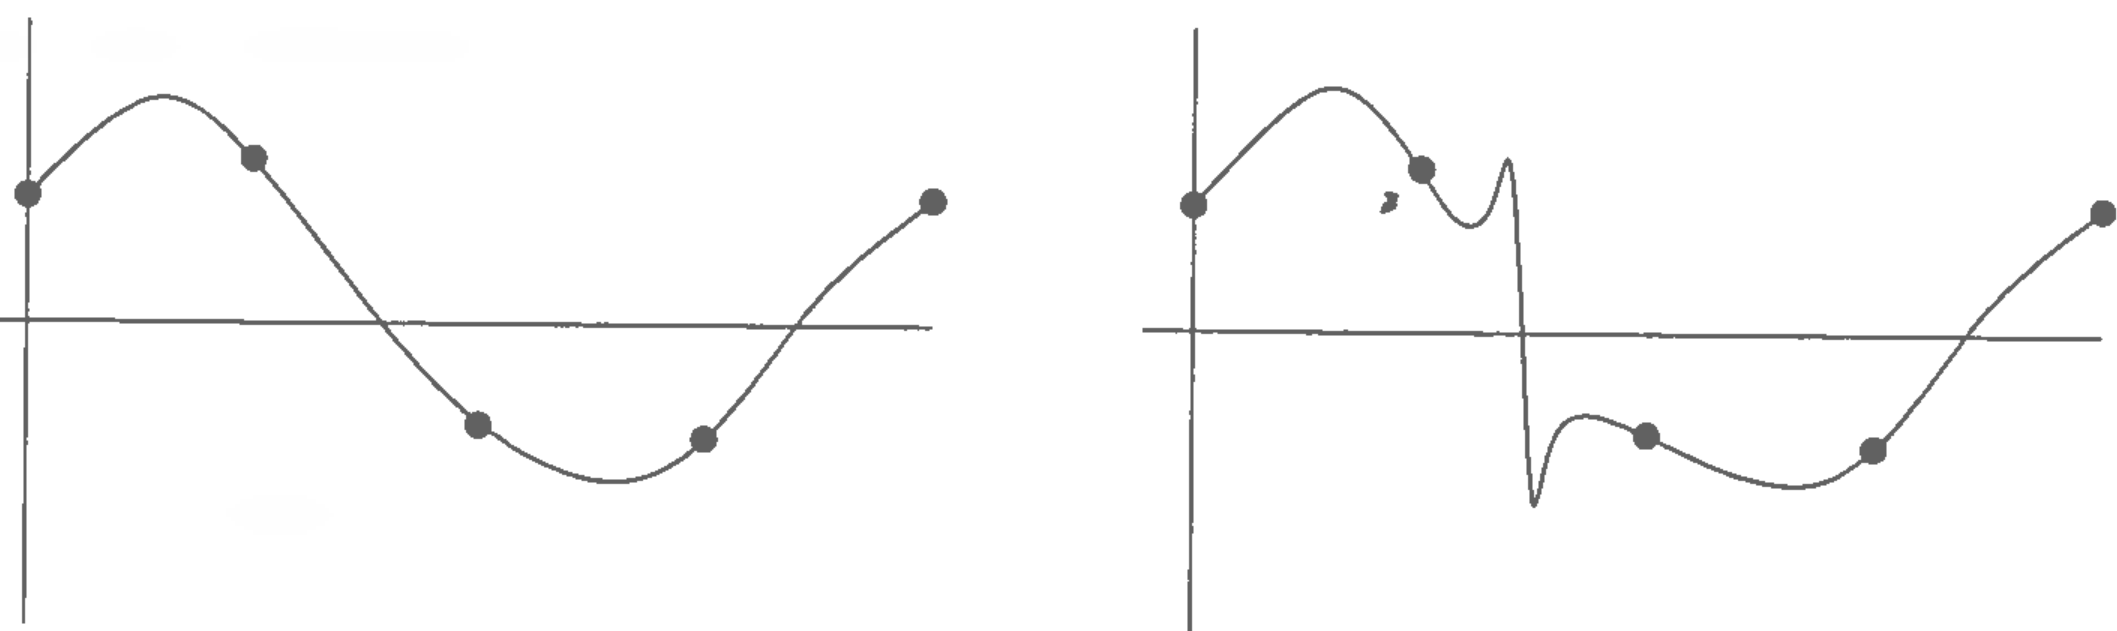

In [5]:
display(Image("DFT.png",width=800))

- Sin embargo, si la función es suficientemente suave, y lo que nos interesesa es describirla a partir de un conjunto de puntos, la DFT será una aproximación muy buena de la función.


- La DFT funciona igual de bien para funciones reales como complejas.


- Sin embargo, en el caso de funciones reales los coeficiente de Fourier cumplen ciertas propiedades adicionales:
<br/>

    - Dado el coeficiente $c_r$ con $1\le r < \frac{1}{2} N$, el coeficiente $c_{N-r}$  cumple que:
    
    
$$c_{N-r}=\sum_{n=0}^{N-1}y_n\exp\left(-i\frac{2\pi(N-r)n}{N}\right)=\sum_{n=0}^{N-1}y_n\exp\left(i\frac{2\pi r n}{N}\right)=\displaystyle c_r^*,$$

- Sólo es necesario calcular la mitad de los coeficientes 
<br/>

    - Si k es par tendremos que calcular $\frac{N}{2}+1$, es decir $c_k$ con $0\le k \le \frac{N}{2}$.
<br/>

    - Si k es impar necesitaremos  $\frac{N+1}{2}$, es decir $c_k$ con  $0\le k \le \frac{N-1}{2}$.
<br/>
        
    - Ambos casos se pueden representar en python con la operación: N//2+1.
    
    
    
- Si la función es compleja esta simplificación no se aplica que tendremos que calcular los $N$ coeficientes.     

**Ejercicio 6.1:** Escribir un programa que calcule la transformada de Fourier discreta de una muestra real de datos contenidos en una array.

Cargar el archivo "pitch.txt" en la carpeta de datos del tema 6 y representar los coeficientes de Fourier de esa función.

In [7]:
from numpy import zeros
from cmath import exp, pi
    
def dft(y):

    N=len(y)
    c=zeros(N//2 + 1,complex)
 
    for k in range(N//2+1):
        for n in range(N):
            c[k]+=y[n]*exp(-2j*pi*k*n/N)
    return c

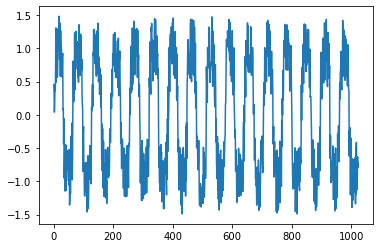

In [33]:
from numpy import loadtxt
from pylab import plot,xlim,show
from matplotlib.pyplot import plot,show,xlim,ylim

y = loadtxt("pitch.txt",float)

show(plot(y))

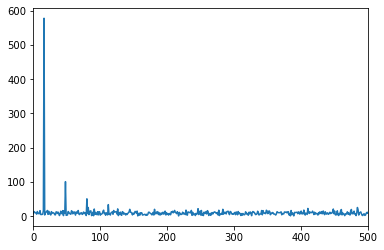

In [18]:
c = dft(y)
plot(abs(c))
xlim(0,500)
show()

### 6.2.1 Eligiendo los puntos de muestra

- Dada una muestra/partición inicial $\{x_n\}$, podemos deplazar los puntos una distancia arbitraria $\Delta$ obteniendo:

$$x_n'=x_n+\Delta=\frac{n}{N}L+\Delta,$$

$\quad$ cuyos coeficientes de Fourier serán:

\begin{align}
c_k=&\sum_{n=0}^{N-1}f\left(x_n+\Delta\right)\exp\left(-i\frac{2\pi k(x_n+\Delta)}{L}\right)=\exp\left(-i\frac{2\pi k \Delta}{L}\right)\sum_{n=0}^{N-1}f\left(x'_n\right)\exp\left(-i\frac{2\pi kx_n}{L}\right)\nonumber\\
=&\,\exp\left(-i\frac{2\pi k \Delta}{L}\right)\sum_{n=0}^{N-1}y'_n\exp\left(-i\frac{2\pi kx_n}{L}\right).\nonumber\\
\end{align}

- Por tanto, llamando 

$$c'_k=c_K \exp\left(i\frac{2\pi k \Delta}{L}\right)$$

$\quad$ se obtiene que

$$c'_k=\sum_{n=0}^{N-1}y'_n\exp\left(-i\frac{2\pi kx_n}{L}\right),$$


$\quad$ que es expresión equivalente a la de los coeficientes de Fourier para la partición inicial $\{x_n\}$. 

- La transformada de Fourier discreta es independiente de los puntos de muestra que se escojan. Los pesos sólo cambiaran por un factor de fase. 


- Dado un intervalo $[0,L]$ en el que la función es periódica, dividido en $N$ subintervalos hay dos elecciones habituales para definir la transformada de Fourier discreta:
<br/>

    - La llamada DFT de tipo I, en el que los puntos de muestra se toman en el comienzo de cada subintervalo.
    - La DFT de tipo II en que los puntos de muestra se toman en la mitadad de cada subintervalo.

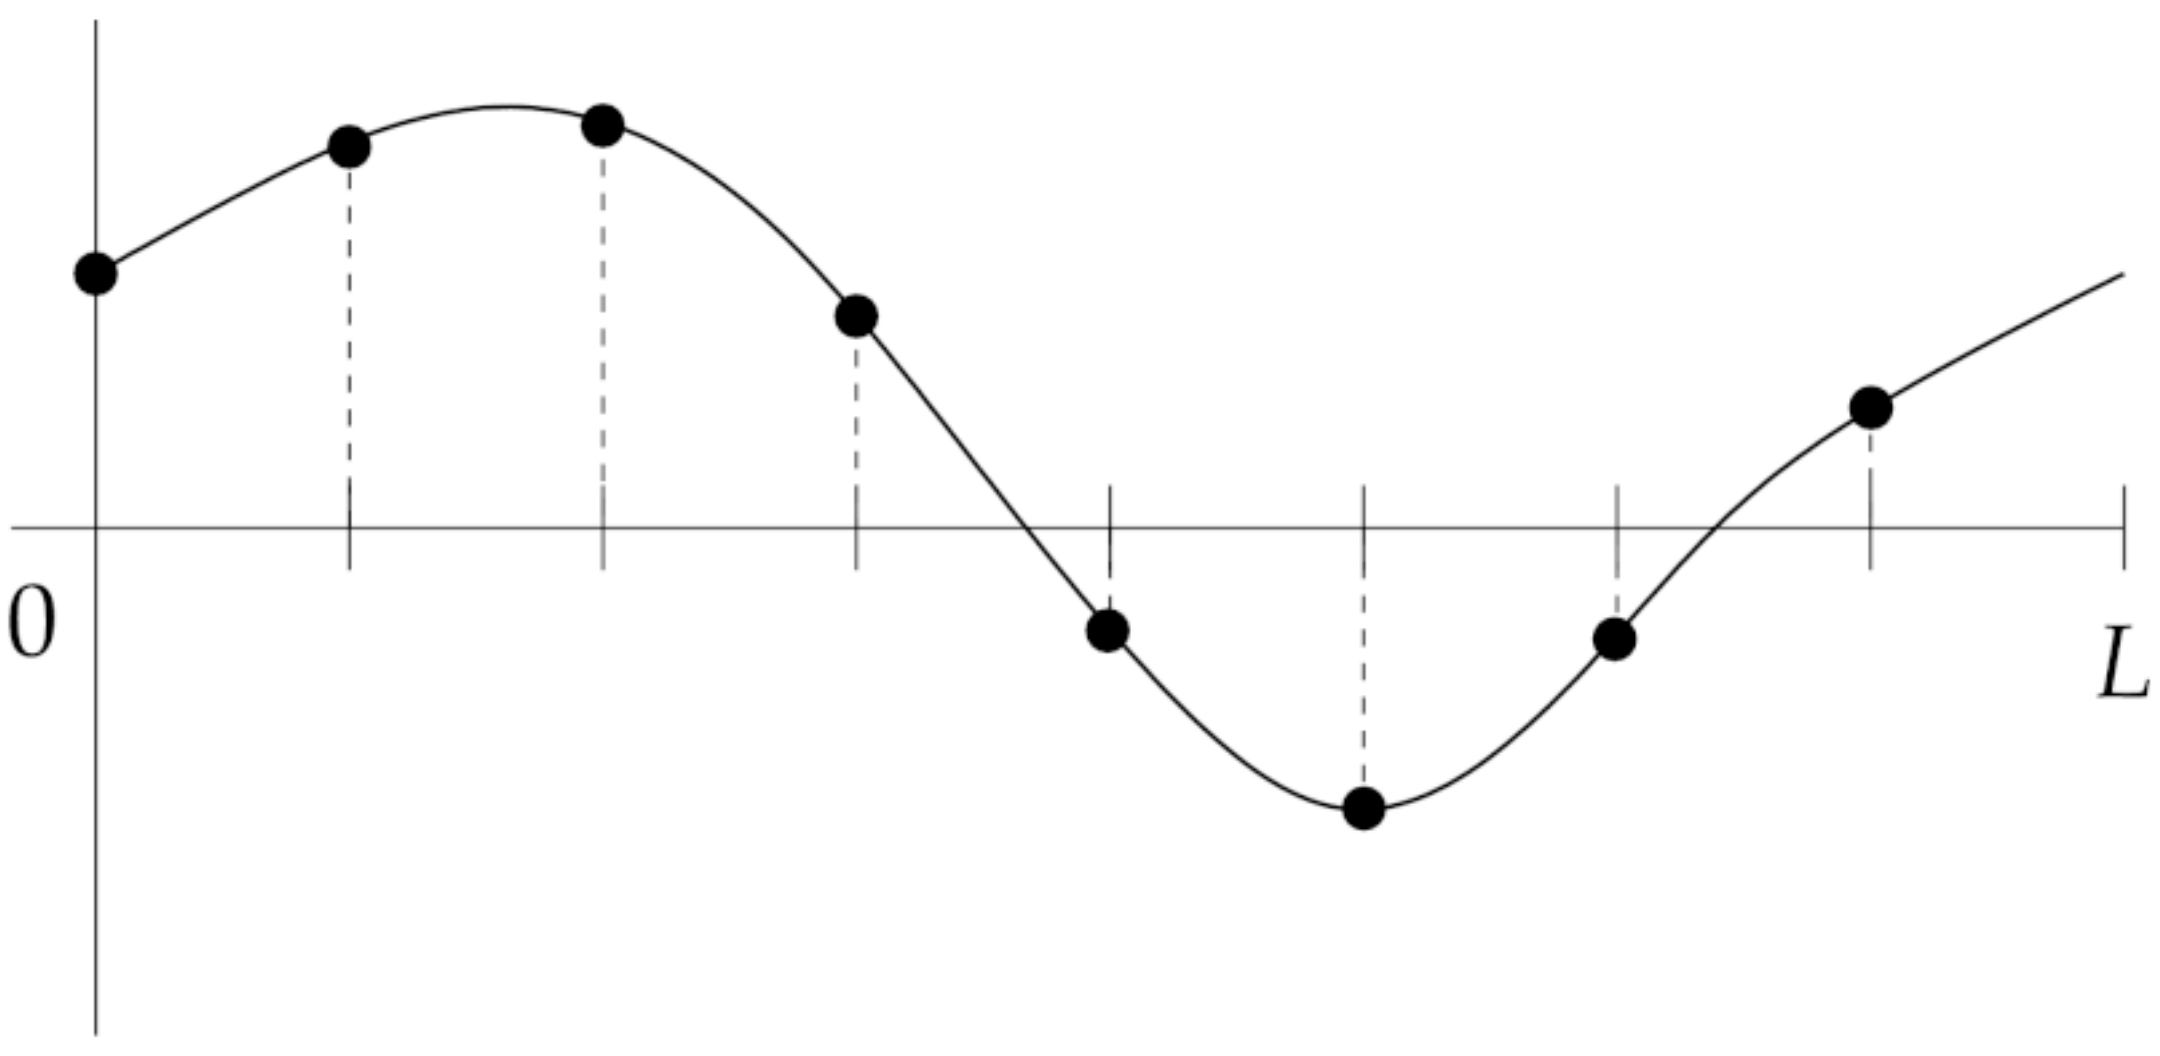

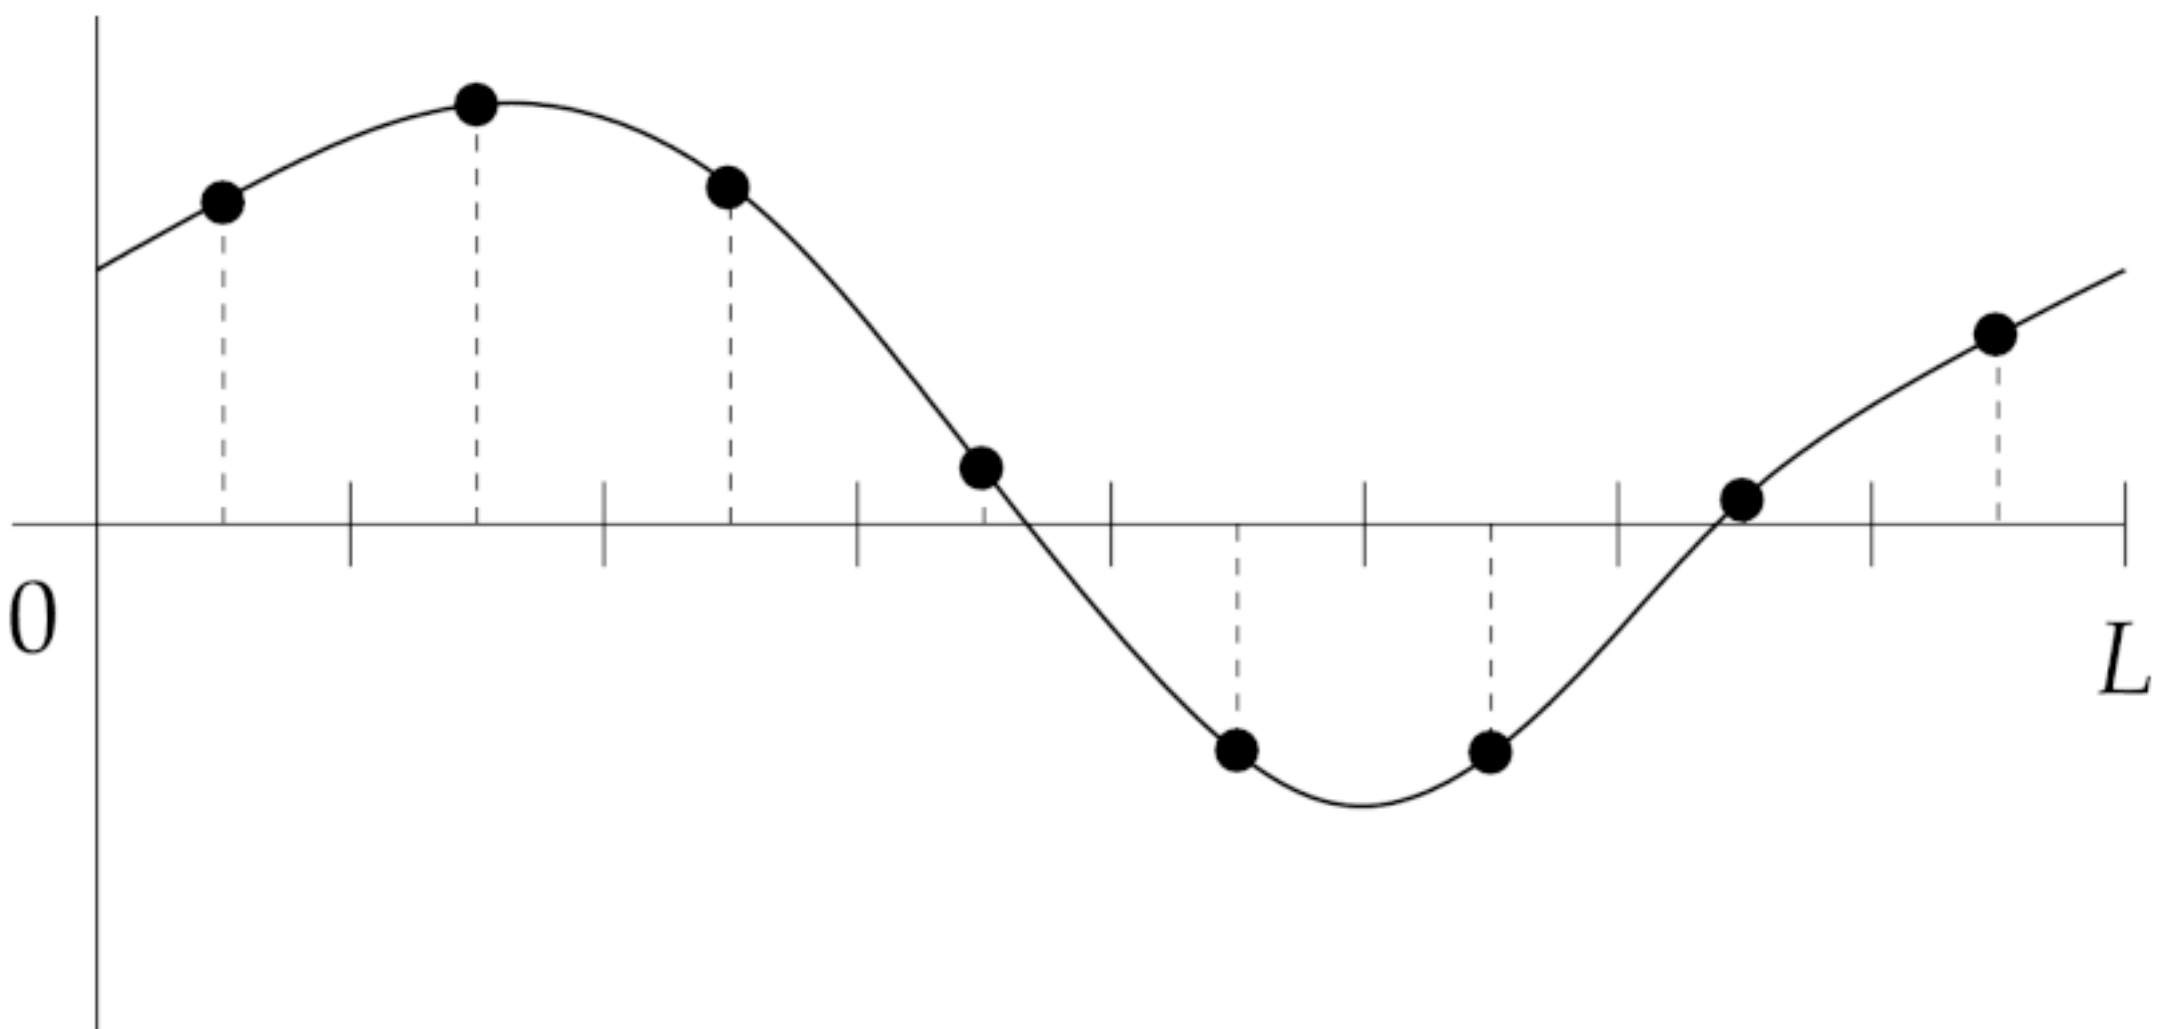

In [30]:
display(Image("DFTI.png",width=600))
display(Image("DFTII.png",width=600))

- Los coeficientes de Fourier para cada una de estás transformadas de Fourier discretas obviamente serán diferentes:
<br/>

    - En primer lugar, los valores de la función para las dos muestras son diferentes.
    - En segundo, porque los coeficientes para la DFT de tipo II llevan un factor de fase. 

### 6.2.1 Tansformada de Fourier en 2-dimensiones.


- La transformada de Fourier discreta se puede generalizar de forma trivial a funciones de más de una variable.

- En el caso particular de una función de dos dimensiones, dada una muestra  con $M\times N$ puntos, si fijamos la coordenada $x$ a la fila $m$:

$$c_{ml}=\sum_{n=0}^{N-1}y_{mn}\exp\left(-i\frac{2\pi l n}{N}\right).$$

- Variando ahora cada una de la filas:

$$c_{kl}=\sum_{m=0}^{M-1}\sum_{n=0}^{N-1}y_{mn}\exp\left[-2i\pi\left(\frac{ k m}{M}+\frac{ l n}{N}\right)\right],$$

$\quad$ que proporciona el valor de los coeficentes de Fourier para una función en dos dimensiones. 

- La correspondiente transformada de Fourier inverse será:

$$y_{mn}=\frac{1}{M N}\sum_{k=0}^{M-1}\sum_{l=0}^{N-1}c_{kl}\exp\left[2i\pi\left(\frac{ k m}{M}+\frac{ l n}{N}\right)\right].$$


- Si la función es real, es importante notar que mientras que al fijar una fila el valor la transformada de función discreta es la de una función real, al variar las filas, estamos haciendo la transformada de la función:

$$\sum_{n=0}^{N-1}y_{mn}\exp\left(-i\frac{2\pi l n}{N}\right),$$

$\quad$ que es compleja.

- Por tanto, en sete caso tendremos que calcular $M\times \left(\frac{1}{2}N+1\right)$ si $N$ es par $M\times \frac{1}{2}\left(N+1\right)$ si $N$ es impar. 


- Las tranformadas de Fourier de dos dimensiones se utilizan de forma general en el tratamiento y procesamiento de imagenes, por ejemplo en.
<br/>

    - en astronomia para analizar señales de estrellas y galaxias.
    - en la microscopía electrónica, 

### 6.2.2 Interpretación Física de la Transformada de Fourier.


- La Transformada de Fourier nos permite expresar/separar una función real o compleja en términos de ondas sinusoidales.


-  Que una función se pueda expresar como una tranformada de Fourier es equivalente a decir que la función:   
   se puede expresar como una suma de ondas sinusoidales de diferentes frecuencias.
   
   
- Por tanto, los coeficientes de la transformación nos dicen cual es la contribución de cada frecuencia en la suma.
   

- Viendo la tranformada de Fourier de una señal obtenomos una imagen de como se separa en frecuencias la señal.  
  Este es basicamente el funcionamiento del análisis de señales. 
 
 
- Volvamos a analizar la señal de ejercicio anterior. 

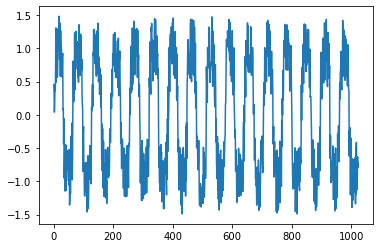

In [32]:
show(plot(y))

- La señal parece consistir enuna onda sinusoidal con una frecuencia bien definida. 

- Sin embargo, esta señal no es perfecta:
<br/>

    - Cada módulo tiene pequeñas variaciones.    
    
    - Sobre cada una de ellas hay oscilaciones que basicamente parecen aleatorias. 
    
    
    
- Volvamos a estudiar sus coeficientes de Fourier:

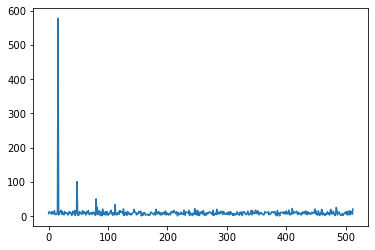

In [36]:
show(plot(abs(c)))

- La gráfica pone en manifiesto una serie de picos dominantes.

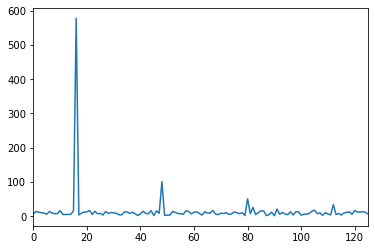

In [39]:
plot(abs(c))
xlim(0,125)
show()

- El primero de ellos es claramente el más grande, e indica la frecuencia dominante que produce ese comportamiento casi sinusoidal.

- El resto de picos, son harmónicos del primero, y hacen que la señal no sea exactamente una onda sinusoidal.

- Finalmenteentre cada pico hay un conjunto casi aleatorio de de frecuencias.  
  Representan un ruido de fondo de la señal, el llamado ruido blanco.

**Ejercicio 6.2**: Transformada de Fourier de funciones simples.

Para las siguientes funciones periódicas, calcular los coeficientes de la DFT usando N = 100 puntos igualmente separados y hacer un gráfico de las amplitudes.

1. Un ciclo de una onda cuadrada con amplitud 1.

2. Una onda dentada con $y_n = n$.

3. Un onda sinuosidal modulada $y_n=\sin \left(\pi\,n\,/N\right)\sin\left(20\pi\,n\,/N\right)$.



In [40]:
# Vamos a definir en primer lugar las tres funciones. 
# Es importante darse cuenta que sólo hay que definir las funciones en su periodo.
# Su tamaño es irrelevante.

from numpy import pi,sin

# 1. Una onda cuadrada de amplitud 1. 

def f_cuadr(x):
    if x<0.5:
        return 1
    else:
        return -1

# 2. una onda dentada en su periodo no es más que una recta. 

# 3. Onda sinuosidal modulada

def f_sin_mod(x):
    return sin(pi*x)*sin(20*pi*x)

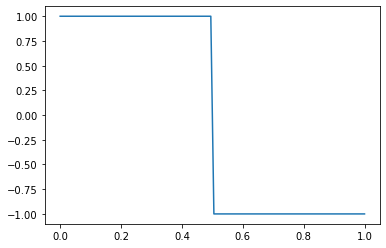

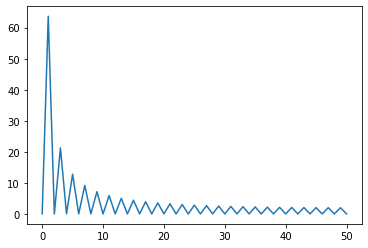

In [61]:
# vamos a representar las señales y sus coeficientes de Fourier para cada función

from numpy import linspace
from matplotlib.pyplot import plot,show

N=100
x1=linspace(0,1,N)
y1=list(map(f_cuadr,x1))
c1=dft(y1)
show(plot(x1,y1))
show(plot(abs(c1)))

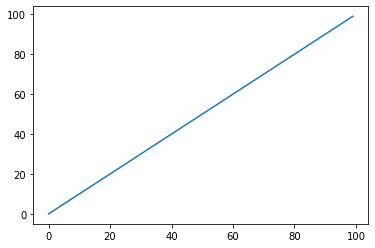

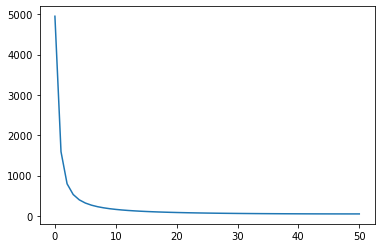

In [62]:
from numpy import arange
x2=arange(N)
show(plot(x2))
c2=dft(x2)
show(plot(abs(c2)))

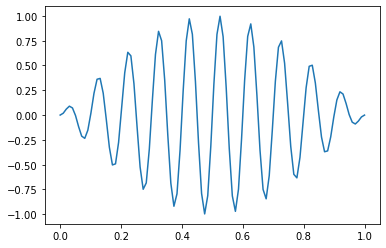

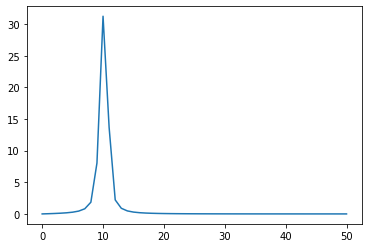

In [65]:
N=100
y3=f_sin_mod(x1)
c3=dft(y3)
show(plot(x1,y3))
show(plot(abs(c3)))

**Ejercicio 6.3:** Detectando la periodicidad.

En la Carpeta de datos del Tema 6 del Campus virtual se encuentra el fichero "sunspots.txt" (ya utilizado en el Tema 1), que contiene el número de manchas solares del Sol contabilizadas mes a mes desde Enero de 1749.  El fichero tiene dos columnas, la primera representa el mes y la segunda el número de manchas solares.

1.  Escribir un programa que lea el archivo y genere un gráfico con el número mensual de manchas solares en función del tiempo.    
    Comprobar que tiene un comportamiento aparentemente cíclico. Estimar la longitud del ciclo en meses.
    
2. Calcular la transformada de Fourier del número de manchas solares y representar la magnitud  de sus coeficientes al cuadrado $|c_k|^2$.  
    Es el llamado espectro de potencia de la señal. 
    
3. Comprobar que hay un frecuencia dominante y obtener su valor.    
   ¿Qué es lo que quiere decir? ¿Cual es la periodicidad que se puede extreaer de la señal?

**Fin de la clase del 10/11/21**